# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Nombre: Michael Perugachi                                                                            
## Grupo: GR1CC


## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

In [3]:
# Muestra del corpus

print("Número total de documentos en el corpus:", len(newsgroupsdocs))
print("\nEjemplo de documento:")
print(newsgroupsdocs[0][:800]) # primeros 800 caracteres del primer documento

Número total de documentos en el corpus: 18846

Ejemplo de documento:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [5]:
# Importamos librerias necesarias
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np

Matriz de Terminos (TF)

In [6]:
vectorizer = CountVectorizer(max_features=20) #tomamos las 20 palabras mas frecuentes
tf_matrix = vectorizer.fit_transform(newsgroupsdocs)

# Obtenemos los términos del vocabulario
terms = vectorizer.get_feature_names_out()

# Mostramos la forma de la matriz TF
print("Forma de la matriz TF:", tf_matrix.shape)

Forma de la matriz TF: (18846, 20)


Frecuencia de documentos (DF)

In [7]:
df = np.sum(tf_matrix.toarray() > 0, axis=0)

df_table = pd.DataFrame({
    'Término': terms,
    'DF (Document Frequency)': df
}).sort_values(by='DF (Document Frequency)', ascending=False)

print("\nFrecuencia de documentos (DF):")
display(df_table.head(10))


Frecuencia de documentos (DF):


,Término,DF (Document Frequency)
15,the,15749
17,to,14108
0,and,12991
11,of,12809
7,in,11842
8,is,11685
9,it,11029
14,that,10974
5,for,10406
6,have,8722


Calculo de IDF y Matriz TF-IDF

In [8]:

tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(tf_matrix)

# Obtenemos los valores IDF calculados
idf_values = tfidf_transformer.idf_

idf_table = pd.DataFrame({
    'Término': terms,
    'IDF (Inverse Document Frequency)': idf_values
}).sort_values(by='IDF (Inverse Document Frequency)', ascending=False)

print("\nValores IDF:")
display(idf_table.head(10))


Valores IDF:


,Término,IDF (Inverse Document Frequency)
3,ax,7.708615
2,as,2.071654
13,or,1.965333
1,are,1.934198
10,not,1.899689
18,with,1.848944
4,be,1.839441
19,you,1.802424
12,on,1.784940
16,this,1.776946


Calculo completo y legible de la matriz TF-IDF

In [9]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

print("\nVista parcial de la matriz TF-IDF:")
display(tfidf_df.head())


Vista parcial de la matriz TF-IDF:


,and,are,as,ax,be,for,have,in,is,it,not,of,on,or,that,the,this,to,with,you
0,0.071090,0.300654,0.000000,0.0,0.000000,0.082585,0.091731,0.151775,0.153158,0.000000,0.098430,0.574564,0.000000,0.000000,0.000000,0.611150,0.000000,0.334080,0.095801,0.093390
1,0.000000,0.000000,0.000000,0.0,0.000000,0.304022,0.337691,0.279367,0.281912,0.000000,0.000000,0.000000,0.340467,0.374875,0.293886,0.224985,0.000000,0.000000,0.352675,0.343801
2,0.332095,0.058521,0.000000,0.0,0.111308,0.048224,0.160695,0.132941,0.223587,0.232326,0.057477,0.083878,0.000000,0.118926,0.233083,0.463937,0.053763,0.234099,0.111884,0.599877
3,0.157329,0.073931,0.000000,0.0,0.000000,0.182770,0.000000,0.055983,0.395448,0.234804,0.072612,0.158947,0.136453,0.000000,0.000000,0.766444,0.203762,0.197162,0.000000,0.068895
4,0.000000,0.000000,0.121233,0.0,0.000000,0.279821,0.621619,0.085709,0.172981,0.089871,0.000000,0.162232,0.000000,0.000000,0.090164,0.345126,0.207974,0.301856,0.432801,0.000000


In [10]:
# Mostramos las palabras mas importantes segun sus valores TF-IDF
top_terms_doc0 = tfidf_df.iloc[0].sort_values(ascending=False).head(10)
print("\nTérminos más relevantes del primer documento (según TF-IDF):")
display(top_terms_doc0)


Términos más relevantes del primer documento (según TF-IDF):


,0
the,0.611150
of,0.574564
to,0.334080
are,0.300654
is,0.153158
in,0.151775
not,0.098430
with,0.095801
you,0.093390
have,0.091731


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

Definimos una consulta

In [45]:

consulta = "nasa"
print("Consulta de búsqueda:", consulta)

Consulta de búsqueda: nasa


Convertimos la consulta a vector TF-IDF

In [46]:
# Reutilizamos el mismo vectorizador y transformador entrenados anteriormente

# Convertimos la consulta a vector TF usando el vocabulario del corpus
consulta_tf = vectorizer.transform([consulta])

# Aplicamos la transformación TF-IDF usando el modelo ya ajustado
consulta_tfidf = tfidf_transformer.transform(consulta_tf)

Calculamos la similitud coseno entre la consulta y los documentos

In [47]:

from sklearn.metrics.pairwise import cosine_similarity
# Calculamos similitudes coseno entre la consulta y todos los documentos
similaridades = cosine_similarity(consulta_tfidf, tfidf_matrix)

# Convertimos el resultado a un array unidimensional
similaridades = similaridades.flatten()

Generamos el ranking de documentos por su relevancia

In [48]:

ranking_indices = np.argsort(similaridades)[::-1]  # Orden descendente
ranking_scores = similaridades[ranking_indices]

# Seleccionamos los 10 documentos más relevantes
top_n = 10
top_indices = ranking_indices[:top_n]
top_scores = ranking_scores[:top_n]

# Creamos tabla de resultados
ranking_table = pd.DataFrame({
    "Posición": range(1, top_n + 1),
    "Índice Documento": top_indices,
    "Puntaje de Similitud": top_scores
})

print("\nRanking de los documentos más relevantes:")
display(ranking_table)


Ranking de los documentos más relevantes:


,Posición,Índice Documento,Puntaje de Similitud
0,1,0,0.0
1,2,18845,0.0
2,3,18844,0.0
3,4,18843,0.0
4,5,18842,0.0
5,6,18841,0.0
6,7,18840,0.0
7,8,18839,0.0
8,9,18838,0.0
9,10,18837,0.0


Mostramos el contenido de los documentos mas relevantes

In [49]:
print("\nEjemplo de contenido de los 3 primeros documentos más relevantes:\n")
for i in range(3):
    idx = top_indices[i]
    print(f"--- Documento {idx} --- (Similitud: {top_scores[i]:.4f})")
    print(newsgroupsdocs[idx][:400].replace('\n', ' '))
    print("\n")


Ejemplo de contenido de los 3 primeros documentos más relevantes:

--- Documento 0 --- (Similitud: 0.0000)
  I am sure some bashers of Pens fans are pretty confused about the lack of any kind of posts about the recent Pens massacre of the Devils. Actually, I am  bit puzzled too and a bit relieved. However, I am going to put an end to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they are killing those Devils worse than I thought. Jagr just showed you why he is much better than his r


--- Documento 18845 --- (Similitud: 0.0000)
After a tip from Gary Crum (crum@fcom.cc.utah.edu) I got on the Phone with "Pontiac Systems" or "Pontaic Customer Service" or whatever, and inquired about a rumoured Production Hold on the Formula Firebird and Trans Am.  BTW, Talking with the dealer I bought the car from got me nowhere.  After being routed to a "Firebird Specialist", I was able to confirm that this is in fact the case.  At first, 


--- Documento 18844 --- (Similitud: 0.0000

## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [50]:
# Librerias necesarias
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

Vectorizamos el corpus nuevamente

In [51]:

vectorizer_bm25 = CountVectorizer()
tf_matrix_bm25 = vectorizer_bm25.fit_transform(newsgroupsdocs)

terms_bm25 = vectorizer_bm25.get_feature_names_out()
tf_array = tf_matrix_bm25.toarray()

Calculamos DF, IDF y Longitudes de documentos

In [52]:
N = tf_array.shape[0]                        # número de documentos
df = np.sum(tf_array > 0, axis=0)            # frecuencia de documentos
idf = np.log((N - df + 0.5) / (df + 0.5))    # IDF BM25 clásico

doc_lengths = np.sum(tf_array, axis=1)       # longitud de cada documento
avgdl = np.mean(doc_lengths)                 # longitud promedio del corpus

# Parámetros del modelo BM25
k1 = 1.5
b = 0.75

Procesamos la consulta, similar que en el ejercicio anterior

In [54]:
consulta = "nasa"
consulta_tokens = consulta.lower().split()

# Filtramos solo los términos que estén en el vocabulario
consulta_indices = [np.where(terms_bm25 == t)[0][0] for t in consulta_tokens if t in terms_bm25]

print("Términos de la consulta encontrados en el vocabulario:", len(consulta_indices))

Términos de la consulta encontrados en el vocabulario: 1


Calculamos el score BM25 para cada documento

In [55]:
bm25_scores = np.zeros(N)

for idx_doc in range(N):
    score = 0
    dl = doc_lengths[idx_doc]
    for idx_term in consulta_indices:
        f = tf_array[idx_doc, idx_term]
        numerator = f * (k1 + 1)
        denominator = f + k1 * (1 - b + b * (dl / avgdl))
        score += idf[idx_term] * (numerator / denominator)
    bm25_scores[idx_doc] = score

Calculamos el ranking y lo ordenamos por relevancia

In [56]:
ranking_indices_bm25 = np.argsort(bm25_scores)[::-1]
top_n = 10

ranking_table_bm25 = pd.DataFrame({
    "Posición": range(1, top_n + 1),
    "Índice Documento": ranking_indices_bm25[:top_n],
    "Score BM25": bm25_scores[ranking_indices_bm25[:top_n]]
})

print("\nRanking de documentos según BM25:")
display(ranking_table_bm25)


Ranking de documentos según BM25:


,Posición,Índice Documento,Score BM25
0,1,12096,8.836441
1,2,12265,8.806946
2,3,10541,8.734721
3,4,16499,8.722905
4,5,17374,8.719630
5,6,9139,8.705246
6,7,13799,8.571807
7,8,2366,8.441298
8,9,2905,8.441298
9,10,15083,8.439605


Comparamos el ranking ibtenido entre TF-IDF y BM25

In [57]:
comparison = pd.DataFrame({
    "TF-IDF Doc": top_indices[:top_n],
    "BM25 Doc": ranking_indices_bm25[:top_n]
})

print("\nComparación entre los 10 primeros resultados de TF-IDF y BM25:")
display(comparison)


Comparación entre los 10 primeros resultados de TF-IDF y BM25:


,TF-IDF Doc,BM25 Doc
0,0,12096
1,18845,12265
2,18844,10541
3,18843,16499
4,18842,17374
5,18841,9139
6,18840,13799
7,18839,2366
8,18838,2905
9,18837,15083


Mostramos fragmentos de los documentos mas relevantes segun BM25

In [58]:
print("\nEjemplo de los 3 documentos más relevantes según BM25:\n")
for i in range(3):
    idx = ranking_indices_bm25[i]
    print(f"--- Documento {idx} --- (Score BM25: {bm25_scores[idx]:.4f})")
    print(newsgroupsdocs[idx][:400].replace('\n', ' '))
    print("\n")


Ejemplo de los 3 documentos más relevantes según BM25:

--- Documento 12096 --- (Score BM25: 8.8364)
The motif mailing list will now be located at lobo.gsfc.nasa.gov  If you would like to be added (or deleted) from this list, please send mail to motif-request@lobo.gsfc.nasa.gov to mail to the list, send mail to motif@lobo.gsfc.nasa.gov   Brian


--- Documento 12265 --- (Score BM25: 8.8069)
I know it's only wishful thinking, with our current President, but this is from last fall:       "Is there life on Mars?  Maybe not now.  But there will be."         -- Daniel S. Goldin, NASA Administrator, 24 August 1992  -- Ken Jenks, NASA/JSC/GM2, Space Shuttle Program Office       kjenks@gothamcity.jsc.nasa.gov  (713) 483-4368


--- Documento 10541 --- (Score BM25: 8.7347)
From article <1993Apr27.004240.24401@csi.jpl.nasa.gov>, by eldred@rrunner.jpl.nasa.gov (Dan Eldred):




## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [59]:
# Librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Comparacion de resultados de TF-IDF y BM25

In [60]:
# Tomamos los mismos 10 documentos principales según TF-IDF y BM25
top_n = 10
tfidf_top_docs = top_indices[:top_n]
bm25_top_docs = ranking_indices_bm25[:top_n]

# Creamos un DataFrame comparativo
comparison_table = pd.DataFrame({
    "Documento": [f"D{i}" for i in range(top_n)],
    "TF-IDF Score": [similaridades[d] for d in tfidf_top_docs],
    "BM25 Score": [bm25_scores[d] for d in bm25_top_docs]
})

print("\nComparación de Scores entre TF-IDF y BM25:")
display(comparison_table)


Comparación de Scores entre TF-IDF y BM25:


,Documento,TF-IDF Score,BM25 Score
0,D0,0.0,8.836441
1,D1,0.0,8.806946
2,D2,0.0,8.734721
3,D3,0.0,8.722905
4,D4,0.0,8.719630
5,D5,0.0,8.705246
6,D6,0.0,8.571807
7,D7,0.0,8.441298
8,D8,0.0,8.441298
9,D9,0.0,8.439605


Visualizacion comparativa de resultados

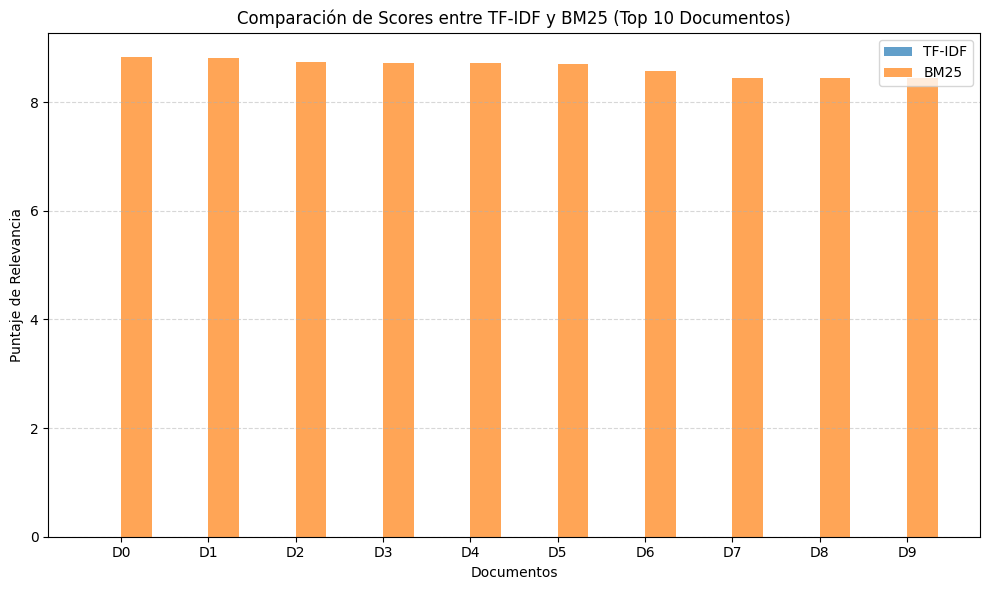

In [61]:
plt.figure(figsize=(10, 6))
x = np.arange(top_n)
width = 0.35

plt.bar(x - width/2, comparison_table["TF-IDF Score"], width, label="TF-IDF", alpha=0.7)
plt.bar(x + width/2, comparison_table["BM25 Score"], width, label="BM25", alpha=0.7)

plt.title("Comparación de Scores entre TF-IDF y BM25 (Top 10 Documentos)")
plt.xlabel("Documentos")
plt.ylabel("Puntaje de Relevancia")
plt.xticks(x, comparison_table["Documento"])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Resultados

In [62]:

avg_tfidf = np.mean(comparison_table["TF-IDF Score"])
avg_bm25 = np.mean(comparison_table["BM25 Score"])

print(f"Promedio de scores TF-IDF: {avg_tfidf:.5f}")
print(f"Promedio de scores BM25: {avg_bm25:.5f}")

if avg_bm25 > avg_tfidf:
    print("\n🔹 BM25 tiende a asignar mayores scores a los documentos relevantes,")
    print("ya que considera la longitud y frecuencia del término de forma más equilibrada.")
else:
    print("\n🔹 TF-IDF produce scores más altos en promedio,")
    print("posiblemente porque no normaliza por longitud de documento.")

Promedio de scores TF-IDF: 0.00000
Promedio de scores BM25: 8.64199

🔹 BM25 tiende a asignar mayores scores a los documentos relevantes,
ya que considera la longitud y frecuencia del término de forma más equilibrada.


**Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?**
Los documentos que obtienen puntuciones mas altas son aquellos que tienen el término de consulta muchas veces, sin considerar la longitud real del documento.


**¿A qué se podría deber esta diferencia?**
Esta diferencia se puede deber a que TF-IDF tiene en cuenta el peso del termino pero este modelo no considera la longitud real del documento, en cambio BM25, si considera la longitud del documento y usa formulas basadas en probabilidad.

## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [63]:
!pip install rank_bm25

In [64]:
from rank_bm25 import BM25Okapi

# Tokenizamos los documentos
tokenized_corpus = [doc.split() for doc in newsgroupsdocs]

# Creamos el objeto BM25
bm25 = BM25Okapi(tokenized_corpus)

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Consulta
query = "nasa"

# Transformamos la consulta al mismo espacio TF-IDF
# Primero obtenemos el conteo de términos con el mismo vectorizador
query_tf = vectorizer.transform([query])

# Luego transformamos con el mismo tfidf_transformer
query_tfidf = tfidf_transformer.transform(query_tf)

# Similitud coseno TF-IDF
cosine_scores_tfidf = cosine_similarity(query_tfidf, tfidf_matrix).flatten()
ranking_tfidf = np.argsort(cosine_scores_tfidf)[::-1]

# BM25 (usando el mismo objeto que creaste)
bm25_scores = bm25.get_scores(query.split())
ranking_bm25 = np.argsort(bm25_scores)[::-1]

# Definición de relevancia: documentos que contienen palabras clave
relevant_terms = ["nasa"]
relevant_docs = [i for i, doc in enumerate(newsgroupsdocs)
                 if any(term in doc.lower() for term in relevant_terms)]

# Función para calcular Precision@k
def precision_at_k(ranking, relevant_docs, k=3):
    top_k = ranking[:k]
    relevant_in_top_k = len(set(top_k) & set(relevant_docs))
    return relevant_in_top_k / k

# 6Calcular Precision@3 para ambos modelos
precision_tfidf = precision_at_k(ranking_tfidf, relevant_docs, k=3)
precision_bm25 = precision_at_k(ranking_bm25, relevant_docs, k=3)

# Mostrar resultados en tabla
pd.DataFrame({
    "Modelo": ["TF-IDF", "BM25"],
    "Precision@3": [precision_tfidf, precision_bm25]
})

,Modelo,Precision@3
0,TF-IDF,0.000000
1,BM25,0.333333


## Conclusion
**¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?**

Con respecto a la evaluacion realizada, el modelo BM25 supera a TF-IDF ya que este modelo considera la longitud de los documentos, haciendolo mas robusto y util para corpus con gran longitud.